In [36]:
#==============================================================================
# Import modules
#==============================================================================
import pickle
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

In [37]:
# Load Picke
with open('train4.pkl', 'rb') as f:
    data = pickle.load(f)

In [38]:
data.head()

,demo_0,demo_1,demo_2,demo_3,demo_4,demo_5,demo_6,demo_7,demo_8,demo_9,...,demo_115,demo_116,demo_117,demo_118,demo_119,demo_120,demo_121,demo_122,demo_123,target
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,6.5,1845.9,9.63,missing,missing,missing,missing,0.0,missing,8.20
1,20009,3.22,1.64,92.31,3.18,7.15,13.17,28.71,10.22,2.18,...,4.2,4728.0,0.00,missing,missing,missing,missing,0.0,missing,71.99
2,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,...,51.2,1290.5,3.33,62,5585480,89.13,0,5.8,83166.8,159.32
3,11157,2.39,0.29,98.87,0.62,0.61,10.72,22.81,11.00,17.50,...,3.0,3726.5,0.90,missing,missing,missing,missing,0.0,missing,24.66
4,17192,2.69,0.58,97.40,1.07,0.76,14.30,30.82,14.81,9.56,...,6.8,2510.4,2.26,missing,missing,missing,missing,0.0,missing,35.62


In [39]:
data.info

<bound method DataFrame.info of       demo_0  demo_1  demo_2  demo_3  demo_4  demo_5  demo_6  demo_7  demo_8  \
0      11980    3.10    1.37   91.78    6.50    1.88   12.47   21.44   10.93   
1      20009    3.22    1.64   92.31    3.18    7.15   13.17   28.71   10.22   
2      66049    2.63   26.41   72.45    0.76    0.72   17.79   29.84   18.19   
3      11157    2.39    0.29   98.87    0.62    0.61   10.72   22.81   11.00   
4      17192    2.69    0.58   97.40    1.07    0.76   14.30   30.82   14.81   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1084   72411    2.25   28.48   69.97    0.57    5.36    8.76   21.07    9.39   
1085   34012    2.14    1.07   98.12    0.43    1.83    9.04   17.98    8.56   
1086   12804    2.59    6.09   88.43    4.70    2.83   10.61   21.71    9.93   
1087   51266    2.83    0.95   76.55    4.06   33.93   13.94   30.43   14.79   
1088   15745    2.46   88.99    9.51    0.91    0.53   14.70   26.17   12.34   

      d

Data has string missing values so we convert them to NAN

In [40]:
data = data.replace('missing', np.nan)

In [41]:
print(data.isnull().sum().sum())

20461


In [42]:
print(data.isna().sum())

demo_0        0
demo_1        0
demo_2        0
demo_3        0
demo_4        0
           ... 
demo_120    930
demo_121    930
demo_122      0
demo_123    930
target        0
Length: 125, dtype: int64


Missing Value Plots

<AxesSubplot:>

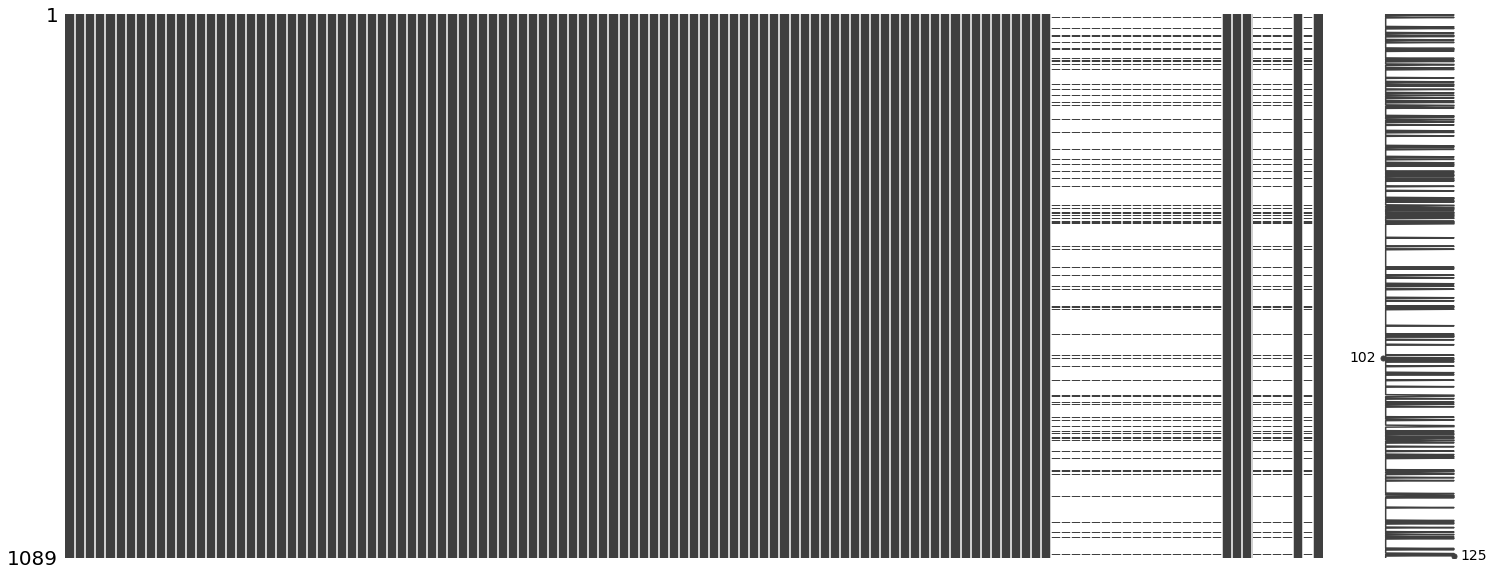

In [43]:
msno.matrix(data)

<AxesSubplot:ylabel='count'>

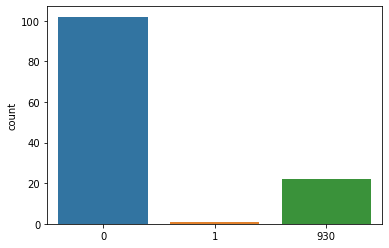

In [49]:
sns.countplot(x = data.isnull().sum())

Treating Missing Values

In [10]:
data = data.dropna(axis=1,thresh = 930)

In [11]:
print(data.isnull().sum().sum())

1


In [12]:
data.columns[data.isna().any()].tolist()

['demo_25']

In [13]:
print(data.dtypes['demo_25'])

object


In [14]:
data['demo_25'] = (data['demo_25'] !='n').astype(int)

In [15]:
data['demo_25'].fillna(data['demo_25'].mean(), inplace = True)

<AxesSubplot:>

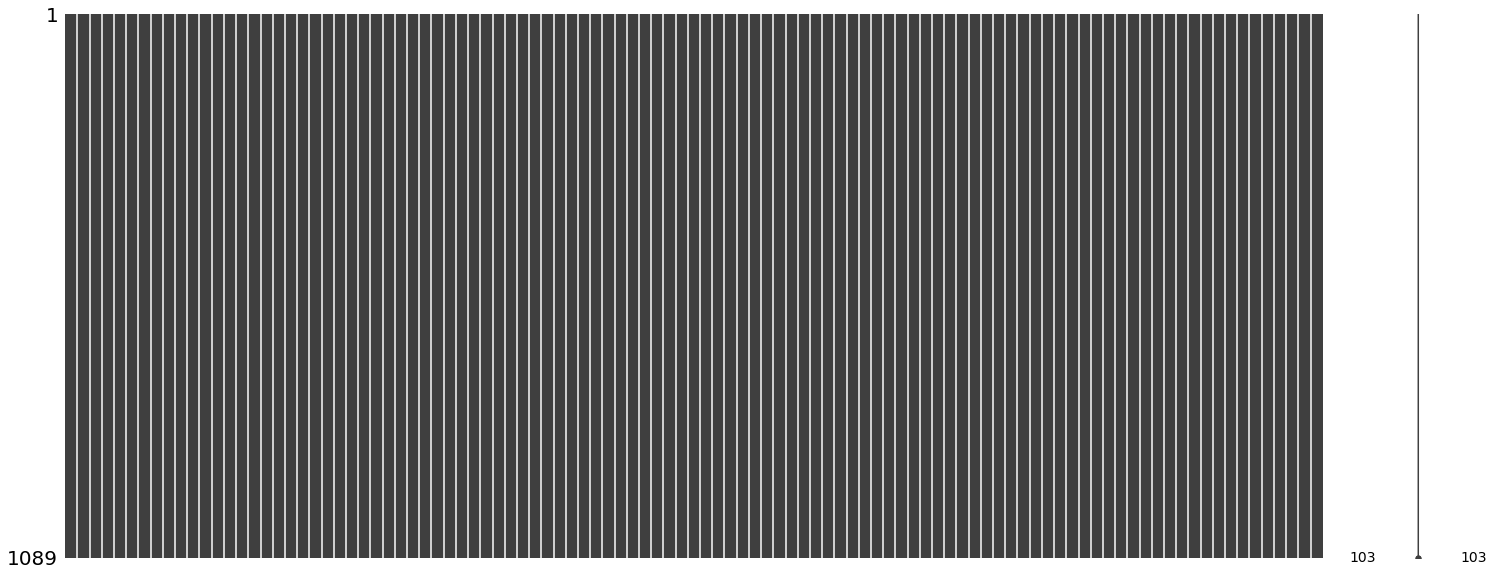

In [16]:
msno.matrix(data)

In [17]:
data.shape

(1089, 103)

<AxesSubplot:>

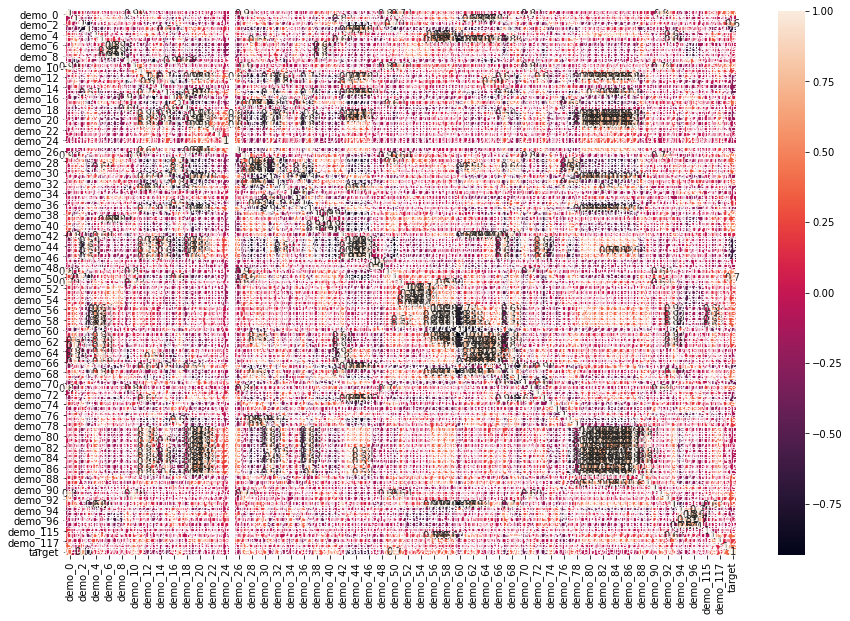

In [18]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(data=correlation_matrix, annot=True)

Cannot Obtain too much information from the heatmap but the colored patterns are showing some correlations

In [20]:
X = data.loc[:, data.columns != 'target']
y = data.loc[:, data.columns == 'target']

After analysis and training models, Ridge with following params was Giving the best results. So we Select Features based on the best model. I am Not including all the model tunings in this report. They are present in the notebook

In [21]:
lr = LinearRegression()
rf = Ridge(alpha = 0.1, fit_intercept = True, normalize = True)

# Create an SFS object
sfs = SFS(estimator=rf,       
          k_features=(1, 102),
          forward=True,    
          scoring='r2',
          cv=5)

sfs = sfs.fit(X,y)

   # Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.72
Best subset (indices): (0, 2, 6, 7, 9, 10, 11, 12, 16, 17, 19, 27, 29, 30, 32, 33, 38, 39, 43, 44, 46, 48, 49, 50, 52, 55, 60, 61, 62, 66, 67, 68, 73, 74, 76, 77, 79, 80, 81, 83, 84, 88, 89, 90, 91, 93, 101)
Best subset (corresponding names): ('demo_0', 'demo_2', 'demo_6', 'demo_7', 'demo_9', 'demo_10', 'demo_11', 'demo_12', 'demo_16', 'demo_17', 'demo_19', 'demo_27', 'demo_29', 'demo_30', 'demo_32', 'demo_33', 'demo_38', 'demo_39', 'demo_43', 'demo_44', 'demo_46', 'demo_48', 'demo_49', 'demo_50', 'demo_52', 'demo_55', 'demo_60', 'demo_61', 'demo_62', 'demo_66', 'demo_67', 'demo_68', 'demo_73', 'demo_74', 'demo_76', 'demo_77', 'demo_79', 'demo_80', 'demo_81', 'demo_83', 'demo_84', 'demo_88', 'demo_89', 'demo_90', 'demo_91', 'demo_93', 'demo_122')


In [22]:
len(sfs.k_feature_idx_)

47

In [23]:
# Train Test Split
X = sfs.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=110)

### Simple Pipleline

In [24]:
simple_pipeline = make_pipeline(Ridge(alpha = 0.1, fit_intercept = True, normalize = True))
simple_pipeline.fit(X_train, y_train)
y_pred = simple_pipeline.predict(X_test)
print(simple_pipeline.score(X_train, y_train))
print(simple_pipeline.score(X_test, y_test))
print(r2_score(y_test, y_pred))

0.745857136728137
0.6875664022799992
0.6875664022799992


In [25]:
# with open('train4.pkl', 'rb') as f:
#     data = pickle.load(f)

In [26]:
# data = data.replace('missing', np.nan)
# data = data.dropna(axis=1,thresh = 930)
# data['demo_25'] = (data['demo_25'] !='n').astype(int)
# data['demo_25'].fillna(data['demo_25'].mean(), inplace = True)

### Compression Pipeline without Feature selection

In [27]:
X = data.loc[:, data.columns != 'target']
y = data.loc[:, data.columns == 'target']

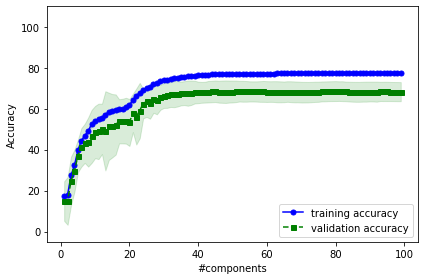

[14.88657046 14.98699197 24.76725726 29.77404222 36.92230001 41.10872096
 43.11849732 43.73941702 46.49405173 48.61512818 48.94727351 50.16996239
 49.20802186 51.40322114 51.70917872 52.30137201 53.8610752  53.97631044
 54.16461509 53.28213438 57.91952585 56.2033431  59.11962844 62.55876788
 63.56917838 62.96099475 64.85675838 64.37959444 65.59117002 66.4578822
 66.5425409  66.97060647 67.13546177 67.31700732 67.44974349 67.63218002
 67.62076886 67.82121469 68.14412463 67.97073622 68.01764683 68.10075449
 68.3281154  68.42775882 68.54650021 68.34518973 68.34780139 68.32784828
 68.40094745 68.42081344 68.50754477 68.58865307 68.53237223 68.49516805
 68.46764207 68.4593255  68.43831954 68.42677658 68.47287831 68.39572379
 68.40106172 68.39594346 68.30608413 68.264921   68.25459272 68.41038158
 68.32548275 68.23679015 68.2077743  68.09277395 68.08910314 68.08367502
 68.16758934 68.26896439 68.29665149 68.46556872 68.48784998 68.56315518
 68.60384893 68.63065105 68.61125135 68.58434784 68.

In [28]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

pls = PLSRegression(scale=False)

# Validation curve for parameter estimation
param_range = list(range(1,100))
train_scores, test_scores = validation_curve(
                estimator=pls, 
                X=X, 
                y=y, 
                param_name='n_components', # The paramter to vary
                param_range=param_range,   # ... and its values
                cv=10)

# Calculate validation curves for training and test sets
train_mean = np.mean(train_scores, axis=1)*100
train_std = np.std(train_scores, axis=1)*100
test_mean = np.mean(test_scores, axis=1)*100
test_std = np.std(test_scores, axis=1)*100

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('#components')
plt.ylabel('Accuracy')
plt.ylim([-5, 110.0])
plt.tight_layout()
plt.grid()
plt.show()
print(test_mean)

The after arrox 20 components the accuracy is not changing much so I will include 20-80 components in the grid search

In [29]:
class PLSRegressionWrapper(PLSRegression):

    def transform(self, X):
        return super().transform(X)

    def fit_transform(self, X, Y):
        return self.fit(X,Y).transform(X) # Only use X for transform when both X and Y are supplied
compression_pipe = make_pipeline(PLSRegressionWrapper(), Ridge(alpha = 0.1, fit_intercept = True, normalize = True))
compression_pipe.get_params()

{'memory': None,
 'steps': [('plsregressionwrapper', PLSRegressionWrapper()),
  ('ridge', Ridge(alpha=0.1, normalize=True))],
 'verbose': False,
 'plsregressionwrapper': PLSRegressionWrapper(),
 'ridge': Ridge(alpha=0.1, normalize=True),
 'plsregressionwrapper__copy': True,
 'plsregressionwrapper__max_iter': 500,
 'plsregressionwrapper__n_components': 2,
 'plsregressionwrapper__scale': True,
 'plsregressionwrapper__tol': 1e-06,
 'ridge__alpha': 0.1,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': True,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

param_grid = [{'plsregressionwrapper__n_components':range(20,80,5)}]


gs = GridSearchCV(estimator=compression_pipe, 
                  param_grid=param_grid, 
                  scoring='r2', 
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)


In [31]:
classifier = gs.best_estimator_
classifier.fit(X, y)

Pipeline(steps=[('plsregressionwrapper', PLSRegressionWrapper(n_components=40)),
                ('ridge', Ridge(alpha=0.1, normalize=True))])

In [32]:
with open('test4.pkl', 'rb') as f:
    data_test = pickle.load(f)

data_test = data_test.replace('missing', np.nan)
data_test = data_test.dropna(axis=1)
test_pred_final = classifier.predict(data_test)
res = pd.DataFrame({'Predicted': test_pred_final[:, 0]})
res.index.name = 'Id'
res.to_csv('compression.csv')

### Choice of Methods Paragragh

The data had alot of features and the data shows multicollinearity. This means that the features have hight effect on each other and a little change can effect te variance. So I decided to focus on regularization regression methods. There are alot of features so the regularization paramter will minimize or even eliminate some of the coeeficients and our model can focus on the important features. Furthermore, we used pls regression as a dimensionality reduction algorithm to reduce the dimensions. There were a lot of missing values in the data and since we had so many features I we decided to remove the features instead of imputing. If this was a tall data set we could has saved the features and removed the rows of imputed the values instead of removing features. If this was a tall dataset then probably other regression techniques would have worked better instead of reguilarization techniques.